In [1]:
# load set of python modules
import pandas as pd
import numpy as np
import scipy as sc
import datetime
from datetime import date
import time
import matplotlib.pyplot as plt
import scipy.stats as stats

import asyncio
import websockets
import websocket
import json
import sys
import requests
import random
import hmac

In [2]:
# load set of FTX futures tickers
pd.set_option('display.max_rows', None)
strinG_ = 'https://ftx.com/api/futures'
pd.DataFrame(requests.get(strinG_).json()['result'])

,name,underlying,description,type,expiry,perpetual,expired,enabled,postOnly,priceIncrement,...,marginPrice,positionLimitWeight,group,change1h,change24h,changeBod,volumeUsd24h,volume,openInterest,openInterestUsd
0,1INCH-PERP,1INCH,1INCH Token Perpetual Futures,perpetual,None,True,False,True,False,1.000000e-04,...,2.521400,20.0,perpetual,0.010217,-0.078873,0.006226,2.523481e+07,9.306520e+06,5.698431e+06,1.436802e+07
1,1INCH-1231,1INCH,1INCH Token December 2021 Futures,future,2021-12-31T03:00:00+00:00,False,False,True,False,1.000000e-04,...,2.452200,40.0,quarterly,0.005330,-0.080988,0.006196,2.260606e+05,8.543600e+04,4.973290e+05,1.219550e+06
2,AAPL-1231,AAPL,Apple December 2021 Futures,future,2021-12-31T21:00:00+00:00,False,False,True,False,1.000000e-02,...,174.020000,200.0,quarterly,-0.000919,-0.007019,-0.000804,6.827836e+04,3.893300e+02,4.216200e+02,7.337031e+04
3,AAVE-PERP,AAVE,Aave Perpetual Futures,perpetual,None,True,False,True,False,1.000000e-02,...,177.590000,100.0,perpetual,0.004241,-0.122796,0.001297,2.380036e+07,1.266443e+05,6.181869e+04,1.097838e+07
4,AAVE-1231,AAVE,Aave December 2021 Futures,future,2021-12-31T03:00:00+00:00,False,False,True,False,1.000000e-02,...,177.290000,200.0,quarterly,0.000282,-0.124796,0.001525,7.951569e+05,4.295090e+03,3.415970e+03,6.056173e+05
5,ABNB-1231,ABNB,Airbnb December 2021 Futures,future,2021-12-31T21:00:00+00:00,False,False,True,False,5.000000e-03,...,181.655000,200.0,quarterly,0.000000,-0.025404,0.000000,2.288362e+01,1.250000e-01,9.905000e+01,1.799293e+04
6,ACB-1231,ACB,Aurora Cannabis Inc December 2021 Futures,future,2021-12-31T21:00:00+00:00,False,False,True,False,1.000000e-03,...,6.300000,200.0,quarterly,0.000000,-0.045310,0.000000,6.300000e+01,1.000000e+01,2.859800e+03,1.801674e+04
7,ADA-PERP,ADA,Cardano Perpetual Futures,perpetual,None,True,False,True,False,5.000000e-06,...,1.301805,5.0,perpetual,0.007601,-0.065738,0.005301,1.668659e+08,1.245546e+08,6.421009e+07,8.358901e+07
8,ADA-1231,ADA,Cardano December 2021 Futures,future,2021-12-31T03:00:00+00:00,False,False,True,False,5.000000e-06,...,1.300465,10.0,quarterly,0.006478,-0.068208,0.002842,6.753432e+06,5.076183e+06,2.524738e+06,3.283333e+06
9,AGLD-PERP,AGLD,Adventure Gold Perpetual Futures,perpetual,None,True,False,True,False,5.000000e-04,...,1.493500,20.0,perpetual,0.007420,-0.158354,0.005047,8.110746e+06,5.158712e+06,2.210501e+06,3.301383e+06


In [3]:

pd.set_option('display.max_rows', 50)


start_ = datetime.datetime(2021, 10, 1,0,0).timestamp()
end_ = datetime.datetime(2021, 10, 31,0,0).timestamp()

ticker_ = 'BTC'
string_ = 'https://ftx.com/api/markets/' + ticker_ +'-PERP/candles?resolution=300&start_time=' + str(int(start_))\
            + '&end_time=' + str(int(end_))

# GET /markets/{market_name}/candles?resolution={resolution}&start_time={start_time}&end_time={end_time}
historical = requests.get(string_).json()
res_btc = pd.DataFrame(historical['result'])
res_btc['time'] = pd.to_datetime(res_btc['time'], unit='ms')


data_ = pd.DataFrame(res_btc.time)

for ticker_ in ['BTC', 'ETH', 'ADA']:
    string_ = 'https://ftx.com/api/markets/' + ticker_ +'-PERP/candles?resolution=300&start_time=' + str(int(start_))\
            + '&end_time=' + str(int(end_))
    historical = requests.get(string_).json()
    res_ = pd.DataFrame(historical['result'])
    res_['time'] = pd.to_datetime(res_['time'], unit='ms')
    
    data_[ticker_] = res_.close

data_ = data_.resample('60min', on='time').last().drop(['time'], 1)
data_.head(10)

,BTC,ETH,ADA
time,,,
2021-10-25 18:00:00,63176.0,4213.7,2.159910
2021-10-25 19:00:00,62722.0,4186.7,2.151345
2021-10-25 20:00:00,62593.0,4182.4,2.146105
2021-10-25 21:00:00,62858.0,4193.2,2.147010
2021-10-25 22:00:00,63025.0,4223.2,2.148745
2021-10-25 23:00:00,63102.0,4223.7,2.145830
2021-10-26 00:00:00,63130.0,4243.6,2.166610
2021-10-26 01:00:00,62736.0,4221.4,2.154145
2021-10-26 02:00:00,62764.0,4237.1,2.190810


<AxesSubplot:xlabel='time'>

BTC   -0.000169
ETH    0.000192
ADA   -0.000788
dtype: float64

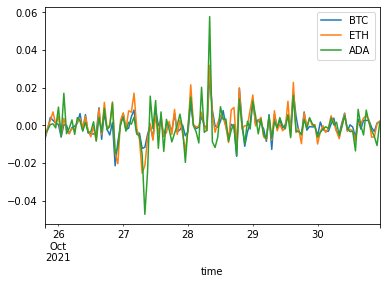

In [4]:
datA_ = data_.pct_change().dropna() #  convert to percentage change (lognormal returns)
display(datA_.plot())
display(datA_.mean())

# get the boundary values -> maximum and minimum range of returns possible for the portfolio of assets
max_ = max(abs(datA_.mean()))
min_ = min(abs(datA_.mean()))

mean_ = np.random.uniform(min_, max_, 1000) # set an array of 1,000 runs of target returns within boundary max_, min_
list_ = []

def rnd_weights(n):
    a = np.random.rand(n)
    return a/a.sum()

for meaN_ in mean_:
    x = rnd_weights(3) # initialize first guess of weights
    # ret_ = np.dot(x, datA_.mean()) # initialize first guess of weights equivalent returns

    var = lambda x: x.dot(datA_.cov().dot(x.T)) # function of portfolio variance to be minimized

    x_bound = [(-1, 1) for i in range(3)] # we set boundary conditions for weight to be able to be 'short'
    x_constraint = ({'type': 'eq', 'fun': lambda x: sum(x) - 1.},\
                    {'type': 'eq', 'fun': lambda x: np.dot(x, datA_.mean()) - meaN_}) # meaN_ is the target return
    
    # scipy optimize code
    optimal_x = sc.optimize.minimize(var, x, method = 'SLSQP', constraints = x_constraint, bounds = x_bound)
    vector_ = [meaN_, optimal_x.x.dot(datA_.cov()).dot(optimal_x.x.T), optimal_x.x[0], optimal_x.x[1], optimal_x.x[2]]
    list_.append(vector_)
    

table of mean-variance optimization with given return, what is variance, and the corresponding weights


,mean_,variance_,wt1,wt2,wt3
0,0.000537,0.000058,0.643483,0.944921,-0.588404
1,0.000700,0.000066,0.819683,1.000000,-0.819683
2,0.000613,0.000061,0.679291,1.000000,-0.679291
3,0.000217,0.000051,0.408921,0.767205,-0.176126
4,0.000374,0.000050,0.732131,0.722772,-0.454902


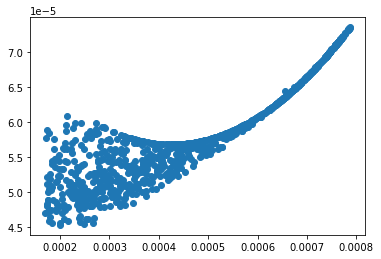

In [8]:
Res_ = pd.DataFrame(list_, columns = ['mean_', 'variance_', 'wt1', 'wt2', 'wt3'])
print('table of mean-variance optimization with given return, what is variance, and the corresponding weights')
display(Res_.head(5))
plt.scatter(Res_.mean_, Res_.variance_)

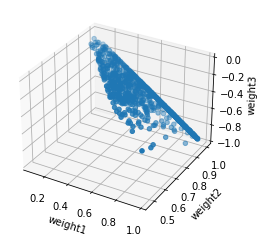

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(Res_.wt1, Res_.wt2, Res_.wt3)

ax.set_xlabel('weight1')
ax.set_ylabel('weight2')
ax.set_zlabel('weight3')

plt.show()